# Import of useful modules:

In [1]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from tqdm.notebook import tqdm

from time import sleep, monotonic, time


import qcodes as qc
from qcodes import Parameter
from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes.utils.metadata import diff_param_values
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.dataset.measurements import Measurement

# sys.path.append('M:\\tnw\\ns\\qt\\2D Topo\\code\\qcodes')
sys.path.append('C:\\qcodes')
from sweeps import do1d, do2d, time_sweep, measure_until, do1d_until

import warnings
warnings.filterwarnings('ignore')

In [ ]:
fridge_name = 'BF1'
# %run ..\..\..\..\..\code\qcodes\init_fridge.py {fridge_name}
%run ..\init_fridge.py {fridge_name}

In [ ]:
snapshot_of_station = station.snapshot()
pprint(snapshot_of_station)

# Data Importing 

Check https://shengyu7697.github.io/python-read-text-file/

## Single Importing

In [15]:
#Enter the name of the source .txt file
txt = 'keithley_P3R1'

#Change the source path of .txt file 
with open(r'C:\Users\admin\SynologyDrive\09 Data\DC_Measurement_Test\Data\18\%s.txt' % txt, 'r') as f:
    x = []
    lines = f.readlines()
    s = lines[0].split(', ')
    for i in range(len(s)-1):
        x.append(float(s[i])) #Enter the name of the list

#Enter the name of a new float list 
keithley_P3R1 = x

print('finished')

finished


## Multiple Importing 

In [23]:
#Enter the names of the source .txt files
names = ['K213_V', 'keithley_P1R1', 'keithley_P2R1', 'keithley_P3R1', 'keithley_P4R1', 'keithley_P1R10', 'keithley_P2R10', 'keithley_P3R10', 'keithley_P4R10']
lists = []

#Change the source path of .txt files 
for i in range(len(names)):
    with open(r'C:\Users\admin\SynologyDrive\09 Data\DC_Measurement_Test\Data\18\%s.txt' % names[i], 'r') as f:
        x = []
        lines = f.readlines()
        s = lines[0].split(', ')
        for j in range(len(s)-1):
            x.append(float(s[j]))
        lists.append(x)

#Enter the name of the new float lists
K213_V, keithley_P1R1, keithley_P2R1, keithley_P3R1, keithley_P4R1, keithley_P1R10, keithley_P2R10, keithley_P3R10, keithley_P4R10 = lists[0], lists[1], lists[2], lists[3], lists[4], lists[5], lists[6], lists[7], lists[8]

print('finished')

finished


# Plotting


## DC Sweep voltage

In [ ]:
#Plotting

Max_V=0.01
n=100000
ydata=[keithley_R0, keithley_R1, keithley_R2, keithley_R3]
yname=['R0', 'R1', 'R2', 'R3']

fig, ax = plt.subplots(3,1, figsize=(5,15))
fig.suptitle('K213 port1 sweep voltage from -%sV to +%sV\nsame data with different range plotting' %(Max_V,Max_V))

for i in range(4):
    ax[0].set_title('Max 0.01V')
    ax[0].plot(K213_V, ydata[i], label=yname[i])
    ax[0].ticklabel_format(style='sci',scilimits=(0,4),axis='both')
    ax[0].legend()
    
    ax[1].set_title('Max 0.005V')
    ax[1].plot(K213_V[50000:-50000], ydata[i][50000:-50000], label=yname[i])
    ax[1].legend()
    
    ax[2].set_title('Max 0.001V')
    ax[2].plot(K213_V[90000:-90000], ydata[i][90000:-90000], label=yname[i])
    ax[2].ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
    ax[2].legend()
    


## DC Fixed voltage (port1)

In [ ]:
#Plotting

v=0.01

plt.plot(K213_V, keithley_R0, alpha = 0.6, label = 'range=0V') 
plt.plot(K213_V, keithley_R1, alpha = 0.6, label = 'range=1V') 
plt.plot(K213_V, keithley_R2, alpha = 0.6, label = 'range=5V')
plt.plot(K213_V, keithley_R3, alpha = 0.6, label = 'range=10V')

plt.title('K213 port1 apply voltage %sV' %v)
plt.xlabel('points')
plt.ylabel('keithley 1 measured voltage')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) #set x-axis scale
# plt.ylim([9.05e-5,9.20e-5])
plt.legend()
plt.show()

In [ ]:
#Distribution Plotting

v=0.01

# print('mean_R0 = %s' %np.mean(keithley_R0))
# print('standard_deviation_R0 = %s' %np.std(keithley_R0))
# print('mean_R1 = %s' %np.mean(keithley_R1))
# print('standard_deviation_R1 = %s' %np.std(keithley_R1))
# print('mean_R2 = %s' %np.mean(keithley_R2))
# print('standard_deviation_R2 = %s' %np.std(keithley_R2))
# print('mean_R3 = %s' %np.mean(keithley_R3))
# print('standard_deviation_R3 = %s' %np.std(keithley_R3))

fig, ax = plt.subplots(4,1, figsize=(15, 15), sharex=True)
fig.suptitle('K213 port1 apply voltage %sV' %v, size=20, y=.95)

ax[0].hist(keithley_R0, 1000, color='C0', alpha=0.7)
ax[0].set_title('Range 0V')
ax[1].hist(keithley_R1, 1000, color='C1', alpha=0.7)
ax[1].set_title('Range 1V')
ax[2].hist(keithley_R2, 1000, color='C2', alpha=0.7)
ax[2].set_title('Range 5V')
ax[3].hist(keithley_R3, 1000, color='C3', alpha=0.7)
ax[3].set_title('Range 10V')

fig.show()
    

In [ ]:
#Save figure
fig.savefig(r'C:\Users\admin\SynologyDrive\09 Data\DC_Measurement_Test\Data\10\2.png')

In [ ]:
#Distribution Plotting

v=0.01

plt.title('K213 port1 apply voltage %sV' %v)
plt.ylabel('points')
plt.xlabel('keithley 1 measured voltage')

plt.hist(keithley_R0, 200, color = 'C0', alpha = 0.7, label = 'range=0V')
plt.hist(keithley_R1, 200, color = 'C1', alpha = 0.7,label = 'range=1V')
plt.hist(keithley_R2, 200, color = 'C2', alpha = 0.7,label = 'range=5V')
plt.hist(keithley_R3, 200, color = 'C3', alpha = 0.7,label = 'range=10V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #set x-axis scale
plt.legend()
plt.show()
    

In [ ]:
#Save figure
fig.savefig(r'C:\Users\admin\SynologyDrive\09 Data\DC_Measurement_Test\Data\09\1.png')

## DC fixed voltage (different ports) 

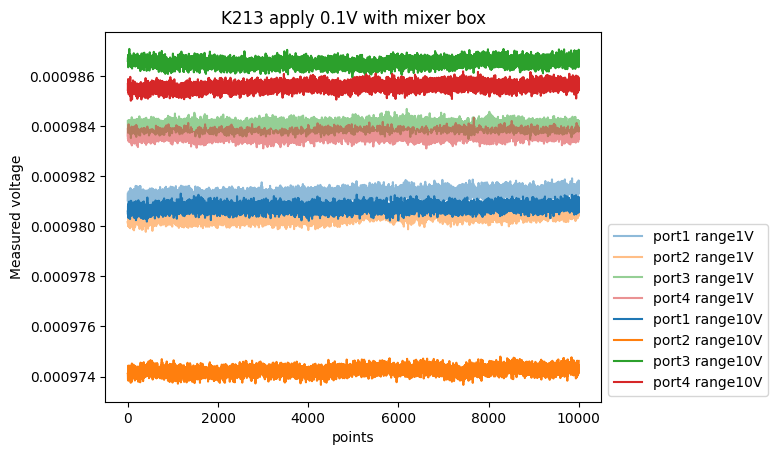

In [26]:
#Plotting

v=0.1

# plt.figure(figsize=(10, 5), dpi=80)

plt.plot(K213_V, keithley_P1R1, alpha = 0.5, label = 'port1 range1V') 
plt.plot(K213_V, keithley_P2R1, alpha = 0.5, label = 'port2 range1V') 
plt.plot(K213_V, keithley_P3R1, alpha = 0.5, label = 'port3 range1V') 
plt.plot(K213_V, keithley_P4R1, alpha = 0.5, label = 'port4 range1V')

plt.plot(K213_V, keithley_P1R10, color='C0', label = 'port1 range10V') 
plt.plot(K213_V, keithley_P2R10, color='C1', label = 'port2 range10V') 
plt.plot(K213_V, keithley_P3R10, color='C2', label = 'port3 range10V') 
plt.plot(K213_V, keithley_P4R10, color='C3', label = 'port4 range10V')

plt.title('K213 apply %sV with mixer box' %v)
plt.xlabel('points')
plt.ylabel('Measured voltage')
plt.legend(bbox_to_anchor=(1,.5))
plt.show()

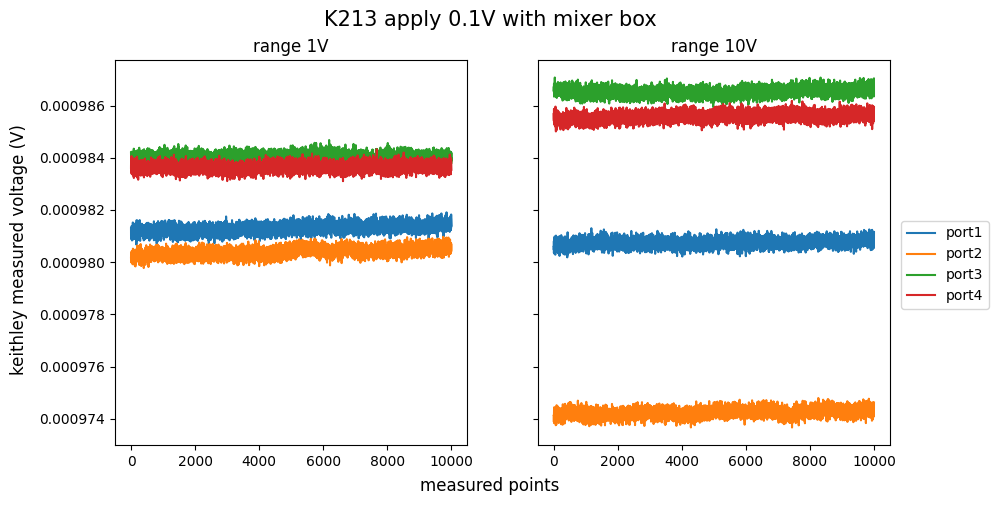

In [27]:
v=0.1

fig, ax = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('K213 apply %sV with mixer box' %v, size=15)
fig.supxlabel('measured points')
fig.supylabel('keithley measured voltage (V)')

ax[0].set_title('range 1V')
ax[0].plot(K213_V, keithley_P1R1, label = 'port1') 
ax[0].plot(K213_V, keithley_P2R1, label = 'port2') 
ax[0].plot(K213_V, keithley_P3R1, label = 'port3') 
ax[0].plot(K213_V, keithley_P4R1, label = 'port4')

ax[1].set_title('range 10V')
ax[1].plot(K213_V, keithley_P1R10, label = 'port1') 
ax[1].plot(K213_V, keithley_P2R10, label = 'port2') 
ax[1].plot(K213_V, keithley_P3R10, label = 'port3') 
ax[1].plot(K213_V, keithley_P4R10, label = 'port4')
ax[1].legend(bbox_to_anchor=(1.3,.6))



fig.show()

In [ ]:
#Distribution Plotting

fig, ax = plt.subplots(1,1, figsize=(9, 9))
fig.suptitle('K213 apply %sV' %str(v), size=15, y=.95)

ax.hist(keithley_P1R1, 100, alpha=0.7, label='port1 range1V')
ax.hist(keithley_P2R1, 100, alpha=0.7, label='port2 range1V')

fig.show()
    

## AC Single loop

In [ ]:
v = 0.001
f_max = 1000

#Plotting
fig, ax = plt.subplots(4,1, figsize=(50, 5), sharex=True)

fig.suptitle('SR860 %sV with frequency range(1, %s)Hz' %(str(v), str(f_max)))

ax[0].plot(frequency, SR860_R, label='R', linewidth=.5)
ax[0].set( ylabel='R', xlim=(0,500), ylim=(0,2e-6))

ax[1].plot(frequency, SR860_X, label='X', linewidth=.5)
ax[1].set(ylabel='X', ylim=(0,2e-6))

ax[2].plot(frequency, SR860_Y, label='Y', linewidth=.5)
ax[2].set(ylabel='Y', ylim=(-1e-6,1e-6))

ax[3].plot(frequency, SR860_P, label='P', linewidth=.5)
ax[3].set(xlabel='frequency(Hz)',ylabel='P')
ax[3].locator_params(nbins=20, axis='x')

In [ ]:
#Save figure
fig.savefig(r'C:\Users\admin\SynologyDrive\09 Data\AC_Measurement_Test\Data\04\test3\1.png')

In [ ]:
K213_V, keithley_R0, keithley_R1, keithley_R2, keithley_R3 = [], [], [], [], []
N=1000000
v=0.01

K213.autorange1(0)
K213.voltage1(v)
sleep(.1)
start = time()

K213.vrange1(0)
for i in range(0,N,1):
    K213_V.append(i)
    keithley_R0.append(keithley_1.amplitude())
    if 100*i%N==0:
        print('Measured range 0V %s points, with elapsed time %ss' %(i,time()-start))
        
K213.vrange1(1)
for i in range(0,N,1):
    keithley_R1.append(keithley_1.amplitude())
    if 100*i%N==0:
        print('Measured range 1V %s points, with elapsed time %ss' %(i,time()-start))
        
K213.vrange1(2)
for i in range(0,N,1):    
    keithley_R2.append(keithley_1.amplitude())
    if 100*i%N==0:
        print('Measured range 5V %s points, with elapsed time %ss' %(i,time()-start))
        
K213.vrange1(3)
for i in range(0,N,1):
    keithley_R3.append(keithley_1.amplitude())
    if 100*i%N==0:
        print('Measured range 10V %s points, with elapsed time %ss' %(i,time()-start))
        
print('finished')

## AC Multiple loop

In [ ]:
N = 10000
v = 0.001
f_max = 100

#Plotting
fig, ax = plt.subplots(4,1, figsize=(20, 10), sharex=True)

fig.suptitle('SR860 %sV with frequency range(1, %s)Hz \n measured n=10 loops with each N=%s points' %(str(v), str(f_max), str(N)), size=20)

for i in range(10):
    ax[0].plot(frequency[i*N:(i+1)*N], SR860_R[i*N:(i+1)*N], alpha=.5, linewidth=.5)
    ax[0].set(ylabel='R')


    ax[1].plot(frequency[i*N:(i+1)*N], SR860_X[i*N:(i+1)*N], alpha=.5, linewidth=.5)
    ax[1].set(ylabel='X')

    ax[2].plot(frequency[i*N:(i+1)*N], SR860_Y[i*N:(i+1)*N], alpha=.5, linewidth=.5)
    ax[2].set(ylabel='Y')

    ax[3].plot(frequency[i*N:(i+1)*N], SR860_P[i*N:(i+1)*N], label='%sth'%i , alpha=.5, linewidth=.5)
    ax[3].set(xlabel='frequency(Hz)', ylabel='P', xlim=(150,250))
    ax[3].xaxis.label.set_fontsize(20)
    ax[3].legend(loc=7, bbox_to_anchor=(1.1, 2.5))

In [ ]:
#Save figure
fig.savefig(r'C:\Users\admin\SynologyDrive\09 Data\AC_Measurement_Test\Data\05\1.png')

In [ ]:
N = 10000
v = 0.001
f_max = 100

#Plotting
fig, ax = plt.subplots(10,1, figsize=(15, 12), sharex=True, sharey=True)
# fig.suptitle('SR860 %sV with frequency range(1, %s)Hz \n Measured n=10 loops with each N=%s points' %(str(v), str(f_max), str(N)), y=.95)
fig.suptitle('P', size=100)
    
for i in range(10):
    ax[i].plot(frequency[i*N:(i+1)*N], SR860_P[i*N:(i+1)*N], linewidth=.2)
    ax[i].set(ylabel='%sth P'%str(i))

ax[9].set(xlabel='frequency(Hz)', xlim=(150,250))
ax[9].xaxis.label.set_fontsize(20)

In [ ]:
#Save figure
fig.savefig(r'C:\Users\admin\SynologyDrive\09 Data\AC_Measurement_Test\Data\05\5.png')